In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv("global air pollution dataset.csv")

In [3]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
df.describe()


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
df.isnull().sum()


Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


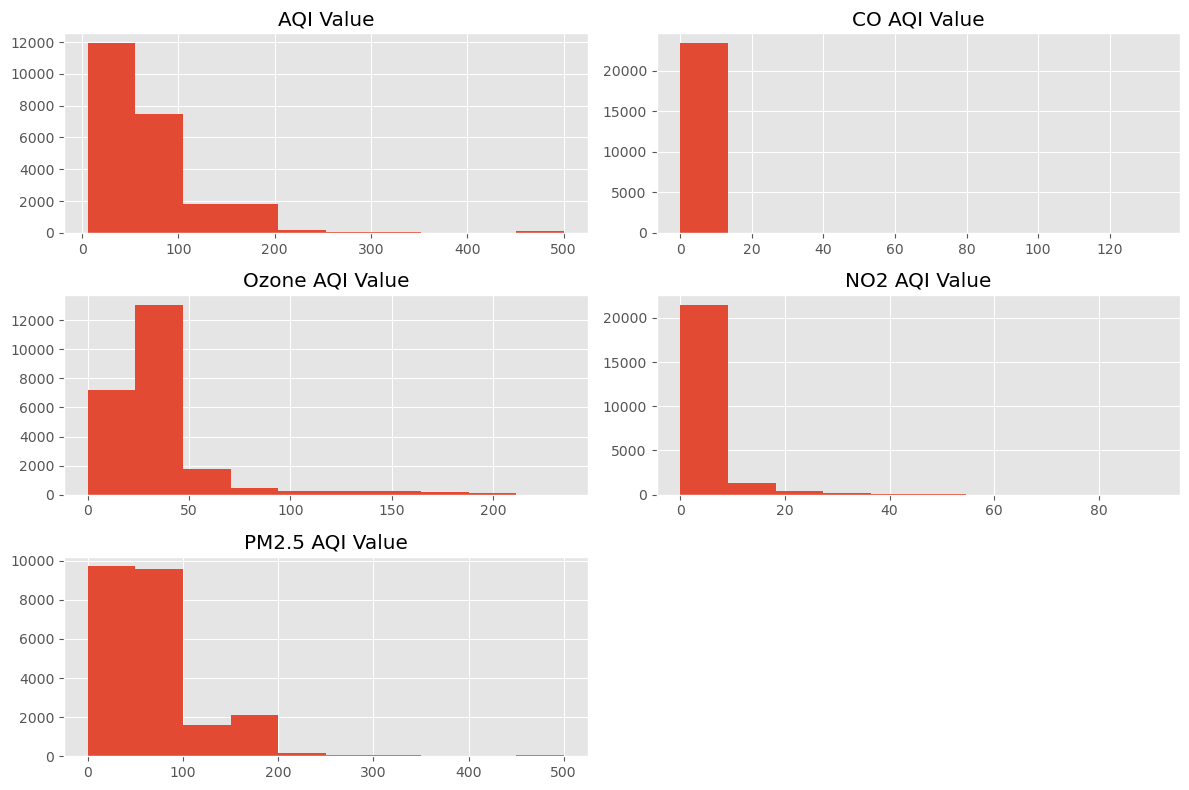

In [12]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()



,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6


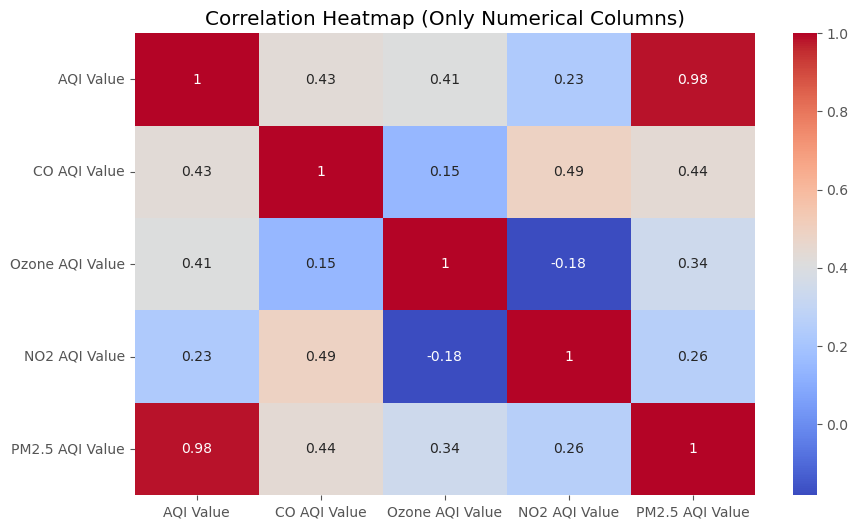

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Only Numerical Columns)")
plt.show()


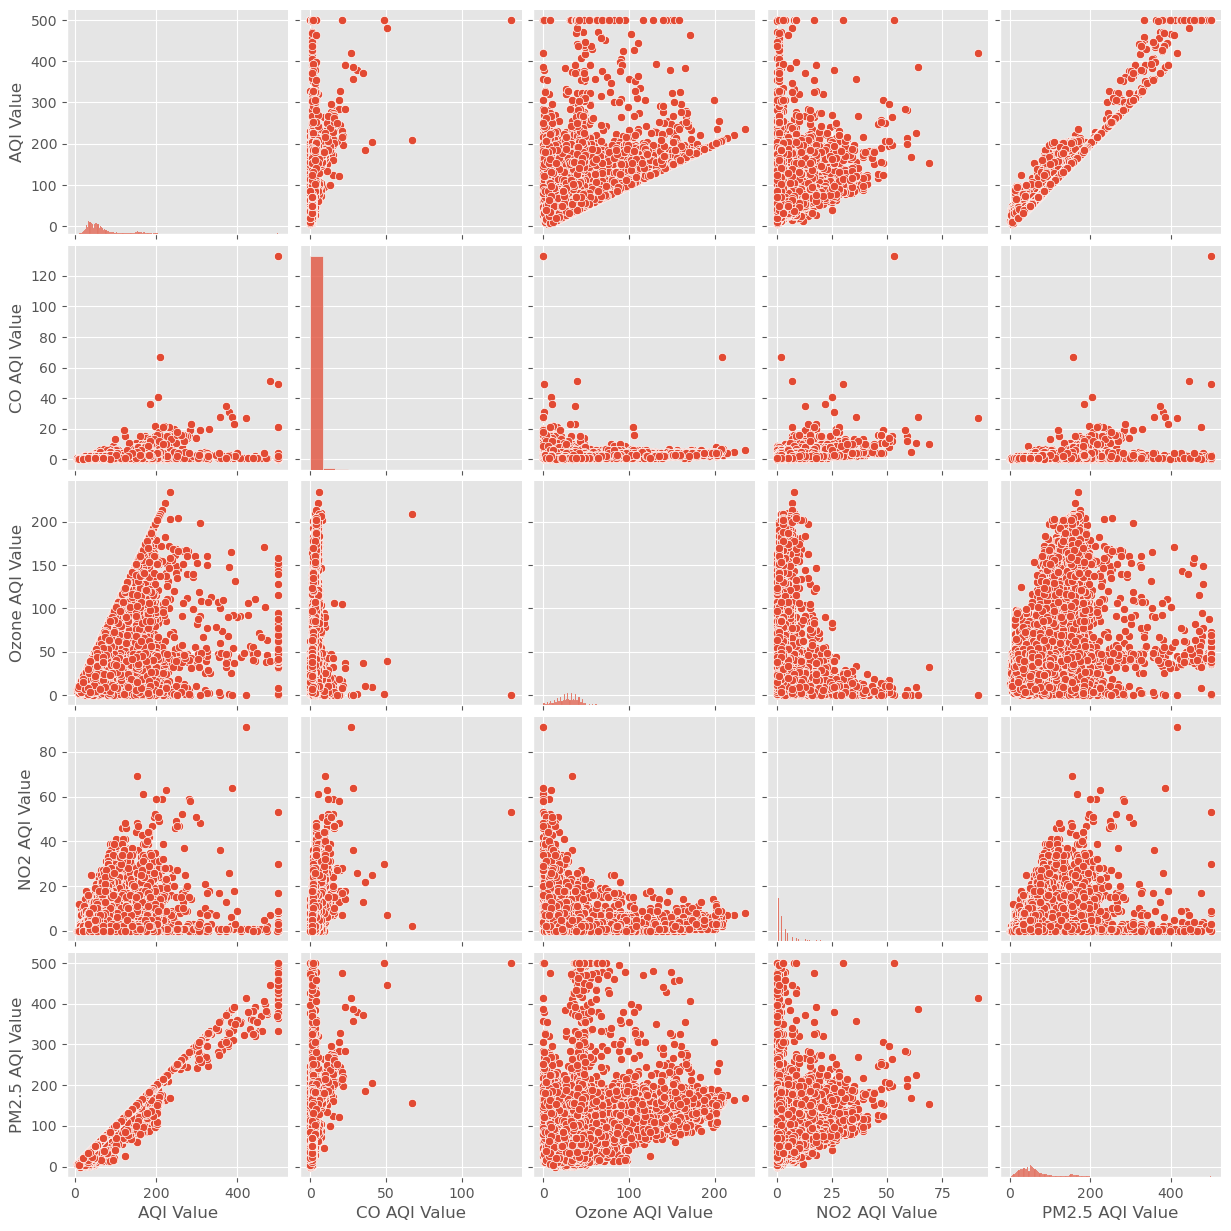

In [16]:
sns.pairplot(df)


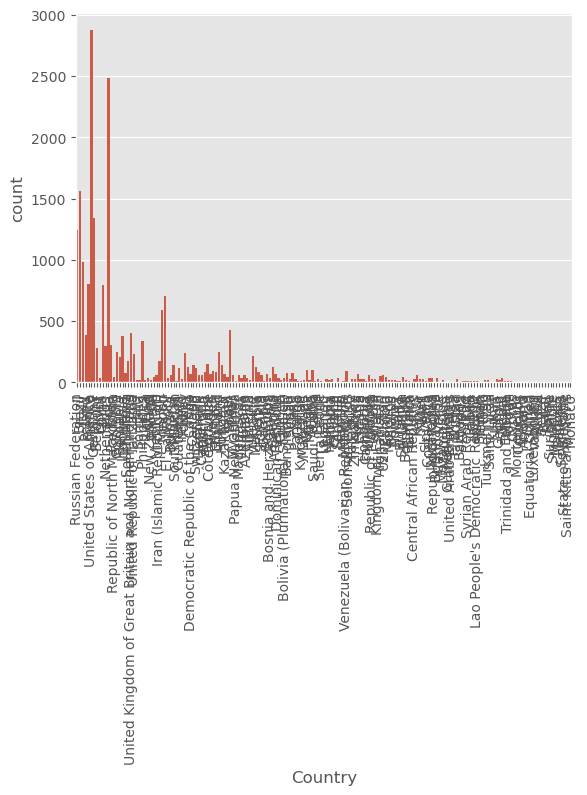

In [17]:
sns.countplot(data=df, x='Country')
plt.xticks(rotation=90)
plt.show()


In [18]:
df.columns


Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [19]:
numeric_df = df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]


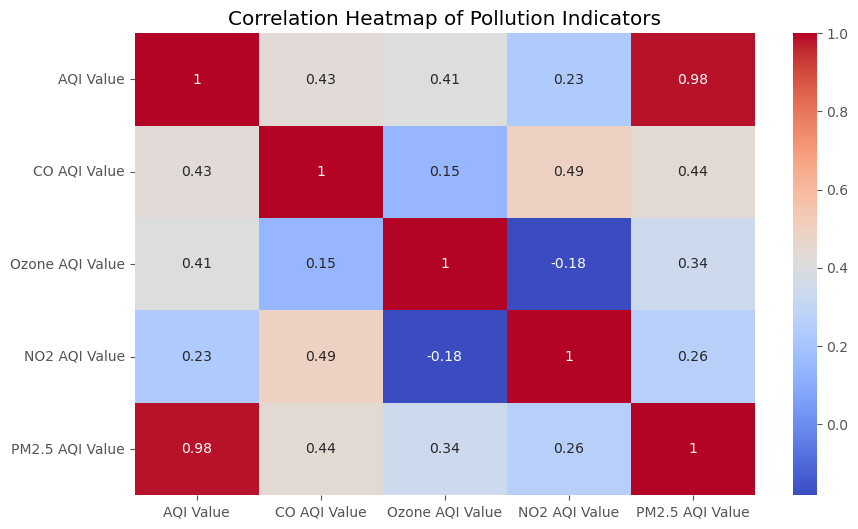

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Pollution Indicators")
plt.show()


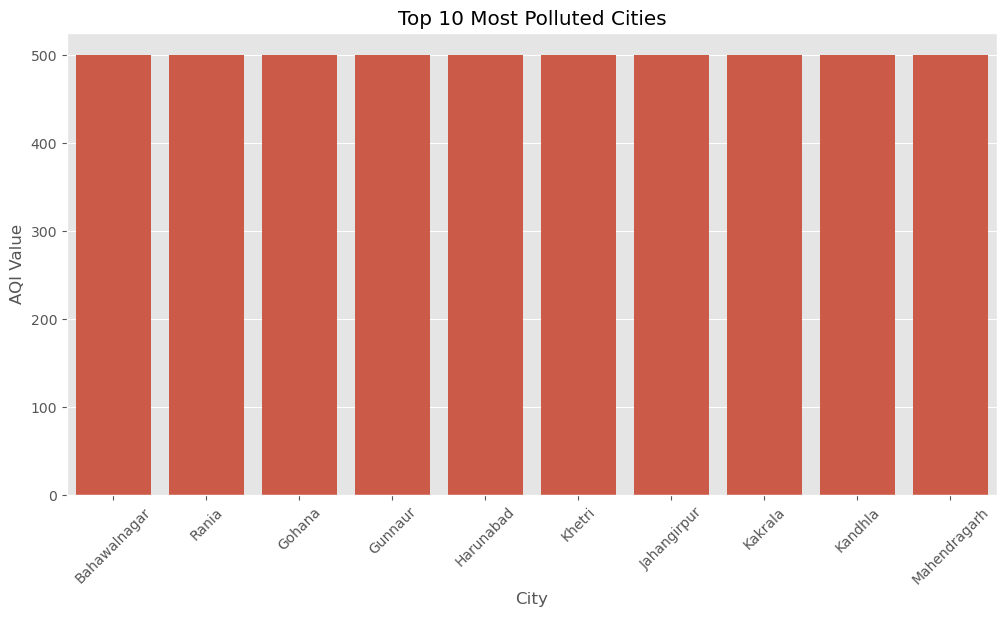

In [21]:
top10 = df.nlargest(10, 'AQI Value')

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='City', y='AQI Value')
plt.xticks(rotation=45)
plt.title("Top 10 Most Polluted Cities")
plt.show()


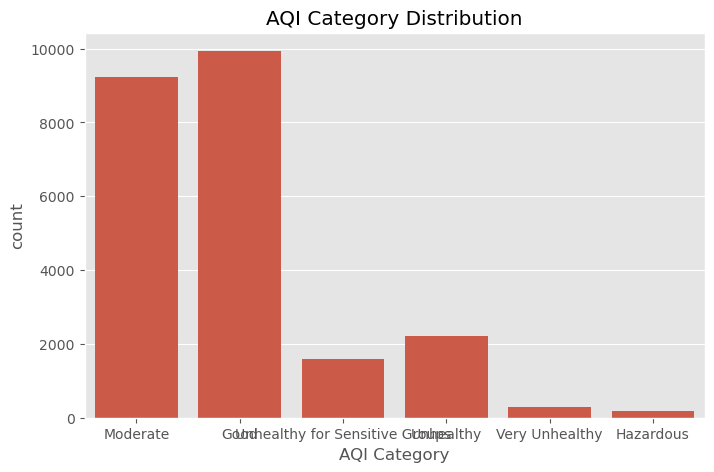

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AQI Category')
plt.title("AQI Category Distribution")
plt.show()

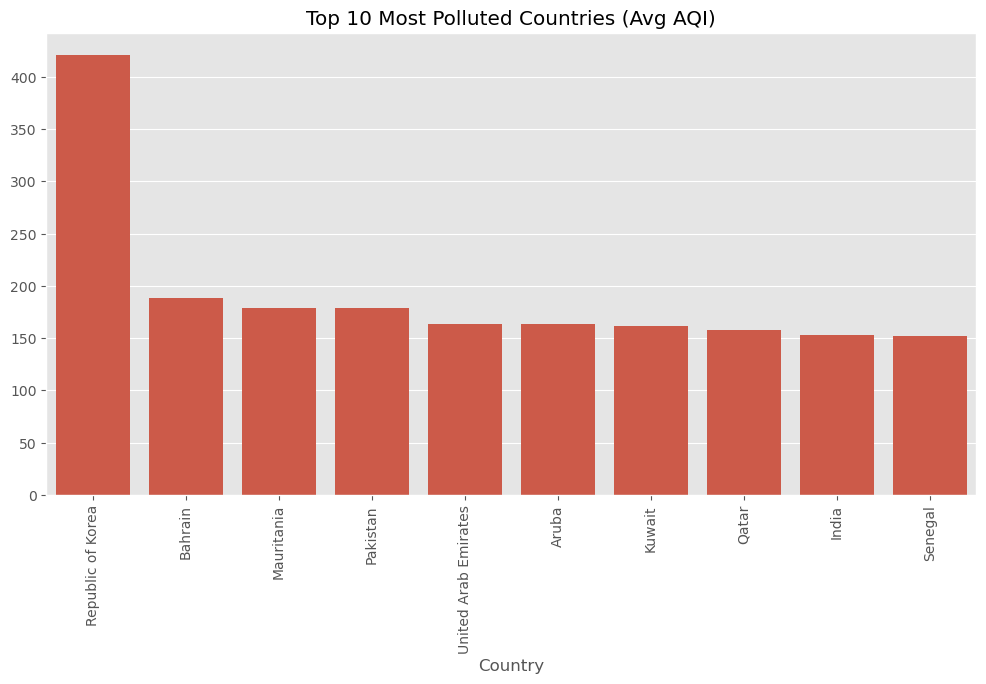

In [23]:
country_aqi = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_aqi.index, y=country_aqi.values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Polluted Countries (Avg AQI)")
plt.show()


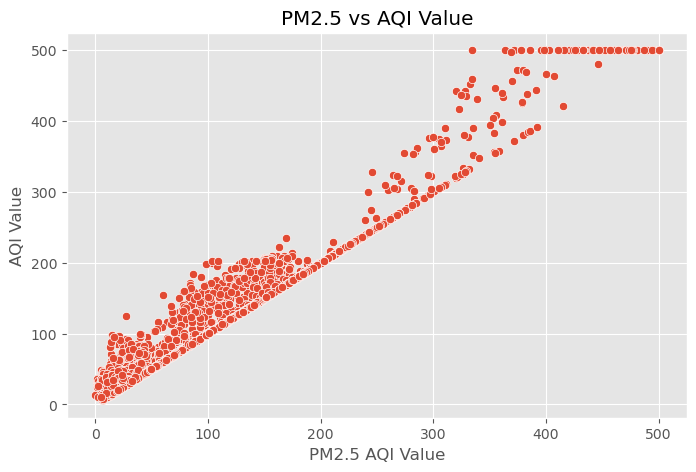

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PM2.5 AQI Value', y='AQI Value')
plt.title("PM2.5 vs AQI Value")
plt.show()


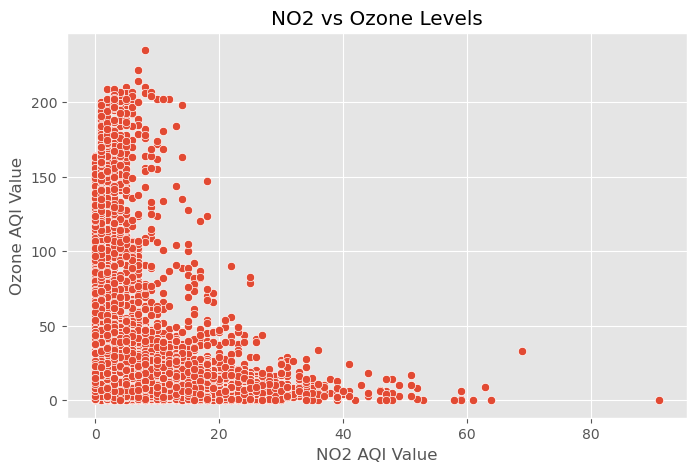

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='NO2 AQI Value', y='Ozone AQI Value')
plt.title("NO2 vs Ozone Levels")
plt.show()
